In [157]:
import math # importe un package
import numpy as np # importe un package sous un nom particulier
from sklearn import linear_model # importe tout un module
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from os import mkdir # importe une fonction
import string
import random
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

Téléchargement des données

In [158]:
url = "https://bitbucket.org/portierf/shared_files/downloads/Galton.txt"
data = pd.read_table(url, sep = '\t', header = 0)
print(data.head())

  Family  Father  Mother Gender  Height  Kids
0      1    78.5    67.0      M    73.2     4
1      1    78.5    67.0      F    69.2     4
2      1    78.5    67.0      F    69.0     4
3      1    78.5    67.0      F    69.0     4
4      2    75.5    66.5      M    73.5     4


2 - Création de la colonne "MeanParents"

In [159]:
print(data['Mother'].dtypes)

float64


In [160]:
data['MeanParents'] = float(0.5)*(data['Father'] + float(1.08)*data['Mother'])
print(data['MeanParents'])

0      75.43
1      75.43
2      75.43
3      75.43
4      73.66
       ...  
893    69.35
894    69.35
895    69.35
896    69.35
897    69.35
Name: MeanParents, Length: 898, dtype: float64


3- Tracer le nuage de points

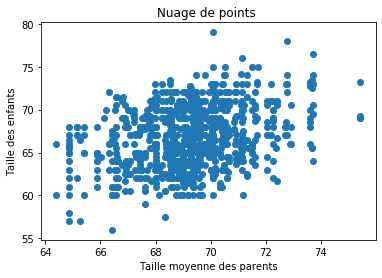

In [161]:
X = data[['MeanParents']]
y = data['Height']
plt.scatter(X,y)
plt.title('Nuage de points ')
plt.xlabel('Taille moyenne des parents')
plt.ylabel('Taille des enfants')
plt.show()

4- Estimer θ 0 , θ 1 à l'aide de LinearRegression de sklearn

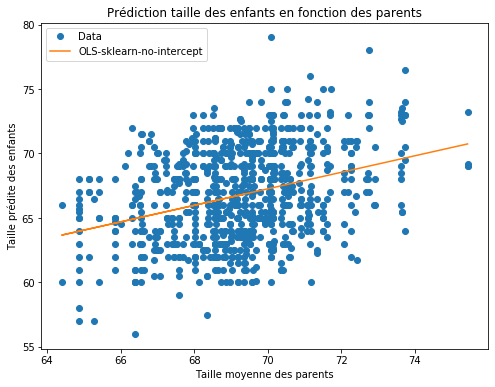

θ0 22.37620568300428
θ1 0.6411903795908166


In [162]:
skl_linmod = linear_model.LinearRegression(fit_intercept=True)
skl_linmod.fit(X, y) # Fit regression model
fig = plt.figure(figsize=(8, 6))
plt.plot(X, y, 'o', label="Data")
plt.plot(X, skl_linmod.predict(X),
label="OLS-sklearn-no-intercept")
plt.xlabel('Taille moyenne des parents')
plt.ylabel('Taille prédite des enfants')
plt.title('Prédiction taille des enfants en fonction des parents')
plt.legend(loc='upper left')
plt.show()
t0 = skl_linmod.intercept_
t1 = skl_linmod.coef_[0]
print('θ0'+' '+str(skl_linmod.intercept_))
print('θ1'+' '+str(skl_linmod.coef_[0]))

5- Recentrage des données 

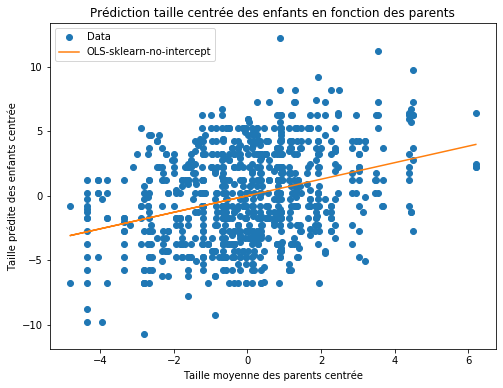

θ0 0.0
θ1 0.6411903795908166


In [163]:
X_cent = data[['MeanParents']] - np.mean(data[['MeanParents']])
y_cent = data['Height'] - np.mean(data['Height'])
skl_linmod_cent = linear_model.LinearRegression(fit_intercept=False)
skl_linmod_cent.fit(X_cent, y_cent) # Fit regression model
fig = plt.figure(figsize=(8, 6))
plt.plot(X_cent, y_cent, 'o', label="Data")
plt.plot(X_cent, skl_linmod_cent.predict(X_cent),
label="OLS-sklearn-no-intercept")
plt.xlabel('Taille moyenne des parents centrée')
plt.ylabel('Taille prédite des enfants centrée')
plt.title('Prédiction taille centrée des enfants en fonction des parents')
plt.legend(loc='upper left')
plt.show()
print('θ0'+' '+str(skl_linmod_cent.intercept_))
print('θ1'+' '+str(skl_linmod_cent.coef_[0]))

6- Histogramme des résidus

Text(0.5, 1.0, 'Histogramme des résidus')

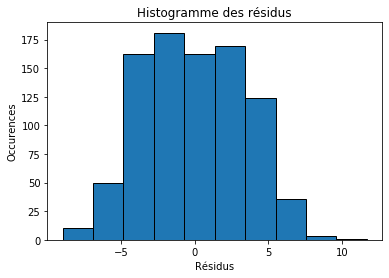

In [164]:
r = data['Height'] - (t1*data['MeanParents'] + t0)
plt.hist(r, edgecolor = 'black')
plt.xlabel('Résidus')
plt.ylabel('Occurences')
plt.title('Histogramme des résidus')

7- Nuage de points filles et garçons et regression linéaire

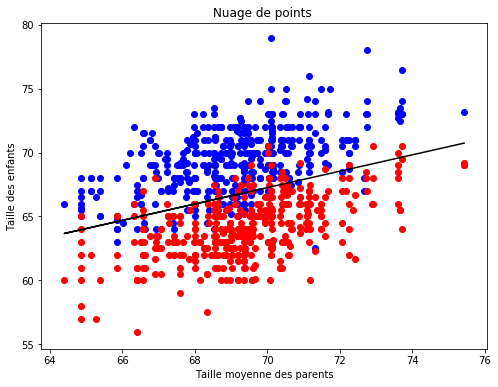

In [165]:
M = data.loc[data['Gender'] == 'M']
F= data.loc[data['Gender'] == 'F']
X_m = M[['MeanParents']]
X_f = F[['MeanParents']]
y_m= M['Height']
y_f= F['Height']
fig = plt.figure(figsize=(8, 6))
plt.scatter(X_m,y_m, color='blue')
plt.scatter(X_f,y_f, color='red')
plt.plot(X, skl_linmod.predict(X),
label="OLS-sklearn-no-intercept", color='black')
plt.title('Nuage de points ')
plt.xlabel('Taille moyenne des parents')
plt.ylabel('Taille des enfants')
plt.show()

8- Régression linéaire sur garçon uniquement

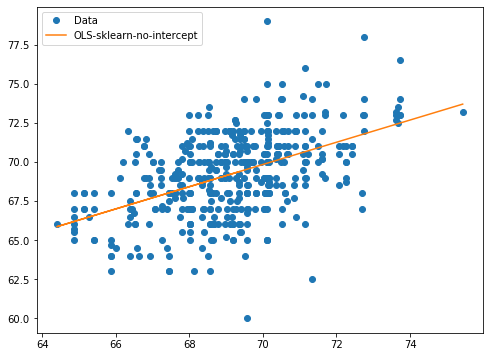

θ0 19.99099970648625
θ1 0.7120758362217017
0     -0.502880
4      1.057494
5      0.057494
8     -0.303184
10    -0.803184
         ...   
890    2.626541
891    1.126541
892   -0.673459
893   -0.873459
894   -1.673459
Length: 465, dtype: float64


Text(0.5, 1.0, 'Histogramme des résidus sur les garçons')

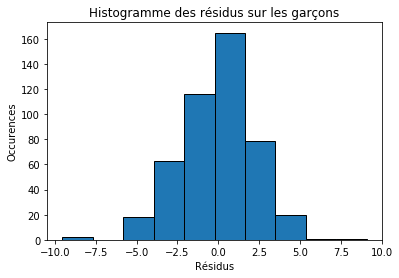

In [166]:
skl_linmod_m = linear_model.LinearRegression(fit_intercept=True)
skl_linmod_m.fit(X_m, y_m) # Fit regression model
fig = plt.figure(figsize=(8, 6))
plt.plot(X_m, y_m, 'o', label="Data")
plt.plot(X_m, skl_linmod_m.predict(X_m),
label="OLS-sklearn-no-intercept")
plt.legend(loc='upper left')
plt.show()
t0 = skl_linmod_m.intercept_
t1 = skl_linmod_m.coef_[0]
print('θ0'+' '+str(skl_linmod_m.intercept_))
print('θ1'+' '+str(skl_linmod_m.coef_[0]))

r_m = M['Height'] - (t1*M['MeanParents'] + t0)
print(r_m)
plt.hist(r_m, edgecolor = 'black')
plt.xlabel('Résidus')
plt.ylabel('Occurences')
plt.title('Histogramme des résidus sur les garçons')

9- Comparaison de prédicteurs

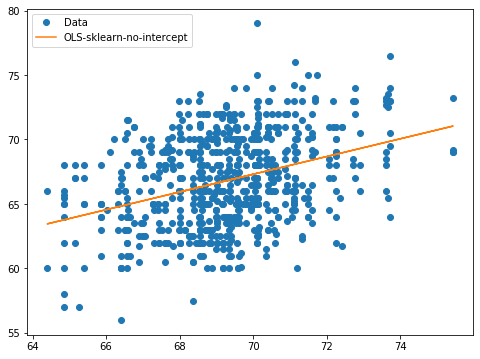

θ0 19.157575292280278
θ1 0.6878332776531352


In [167]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
skl_linmod_train = linear_model.LinearRegression(fit_intercept=True)
skl_linmod_train.fit(X_train,y_train) # Fit regression model
fig = plt.figure(figsize=(8, 6))
plt.plot(X_train, y_train, 'o', label="Data")
plt.plot(X_train, skl_linmod_train.predict(X_train),
label="OLS-sklearn-no-intercept")
plt.legend(loc='upper left')
plt.show()
t0_train = skl_linmod_train.intercept_
t1_train = skl_linmod_train.coef_[0]
print('θ0'+' '+str(skl_linmod_train.intercept_))
print('θ1'+' '+str(skl_linmod_train.coef_[0]))

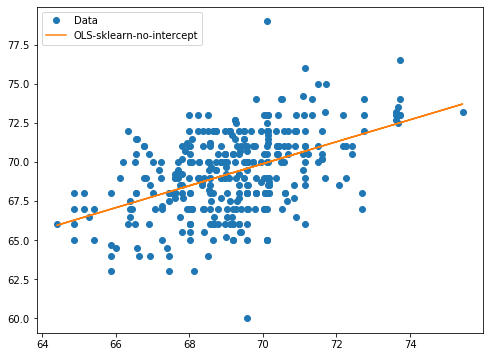

θ0 20.564568230834077
θ1 0.7045594854808538


In [168]:
X_train_m, X_test_m, y_train_m, y_test_m = model_selection.train_test_split(X_m, y_m, test_size=0.2)
skl_linmod_train_m = linear_model.LinearRegression(fit_intercept=True)
skl_linmod_train_m.fit(X_train_m,y_train_m) # Fit regression model
fig = plt.figure(figsize=(8, 6))
plt.plot(X_train_m, y_train_m, 'o', label="Data")
plt.plot(X_train_m, skl_linmod_train_m.predict(X_train_m),
label="OLS-sklearn-no-intercept")
plt.legend(loc='upper left')
plt.show()
t0_train = skl_linmod_train_m.intercept_
t1_train = skl_linmod_train_m.coef_[0]
print('θ0'+' '+str(skl_linmod_train_m.intercept_))
print('θ1'+' '+str(skl_linmod_train_m.coef_[0]))

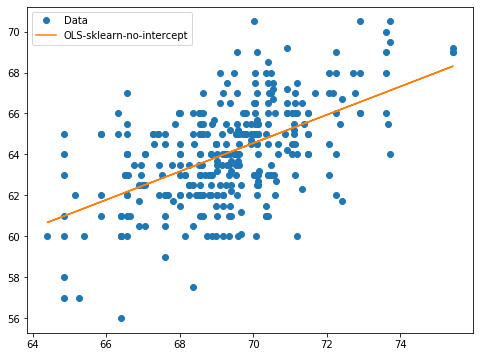

θ0 16.033751718956246
θ1 0.693093845524701


In [169]:
X_train_f, X_test_f, y_train_f, y_test_f = model_selection.train_test_split(X_f, y_f, test_size=0.2)
skl_linmod_train_f = linear_model.LinearRegression(fit_intercept=True)
skl_linmod_train_f.fit(X_train_f,y_train_f) # Fit regression model
fig = plt.figure(figsize=(8, 6))
plt.plot(X_train_f, y_train_f, 'o', label="Data")
plt.plot(X_train_f, skl_linmod_train_f.predict(X_train_f),
label="OLS-sklearn-no-intercept")
plt.legend(loc='upper left')
plt.show()
t0_train = skl_linmod_train_f.intercept_
t1_train = skl_linmod_train_f.coef_[0]
print('θ0'+' '+str(skl_linmod_train_f.intercept_))
print('θ1'+' '+str(skl_linmod_train_f.coef_[0]))

Calcul du Risque de prédiction

In [170]:
r_train = metrics.mean_squared_error(y_test_m, skl_linmod_train.predict(X_test_m))
r_train_m = metrics.mean_squared_error(y_test_m, skl_linmod_train_m.predict(X_test_m))
r_train_global = metrics.mean_squared_error(y_test, skl_linmod_train.predict(X_test))
print(r_train_global)
print(r_train)
print(r_train_m)

12.258625425591633
11.05514544140815
5.865859544617671


10- Construire un prédicteur linéaire qui combine celui appris sur les filles avec celui sur les garçons

In [188]:
mean = np.mean(data['Height'])
M['Predict_m'] = skl_linmod_train_m.predict(X_m)
M['Mean'] =  mean

F['Predict_m'] = skl_linmod_train_f.predict(X_f)
F['Mean'] = mean

data_con = pd.concat([M, F])

#risque
risque = metrics.mean_squared_error(data_con['Height'], data_con['Predict_m'])

#Coef détermination
R2 = 1 - ((np.linalg.norm(data_con['Height'] - data_con['Predict_m']))**2/(np.linalg.norm(data_con['Height'] - data_con['Mean']))**2)
r2 = metrics.r2_score(data_con['Height'], data_con['Predict_m'])

print(risque)
print(r2)
print(R2)

4.656046633198469
0.6368990682324315
0.6368990682324314


/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

11- Construire un prédicteur en encodant GENDER

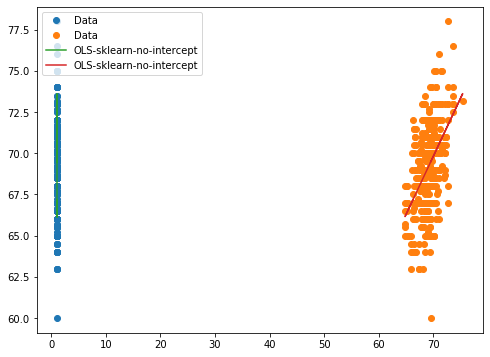

θ0 [20.3728026]
θ1 [0.         0.70588715]


In [172]:
dummies = pd.get_dummies(data["Gender"])
data = pd.concat([data, dummies], axis=1)
M = data.loc[data['Gender'] == 'M']
F= data.loc[data['Gender'] == 'F']
X_g_m = M[['M', 'MeanParents']]
y_g_m = M[['Height']]
X_train_g, X_test_g, y_train_g, y_test_g = model_selection.train_test_split(X_g_m, y_g_m, test_size=0.2)
skl_linmod_train_g_m = linear_model.LinearRegression(fit_intercept=True)
skl_linmod_train_g_m.fit(X_train_g,y_train_g) # Fit regression model
fig = plt.figure(figsize=(8, 6))
plt.plot(X_train_g, y_train_g, 'o', label="Data")
plt.plot(X_train_g, skl_linmod_train_g_m.predict(X_train_g),
label="OLS-sklearn-no-intercept")
plt.legend(loc='upper left')
plt.show()
t0_train = skl_linmod_train_g_m.intercept_
t1_train = skl_linmod_train_g_m.coef_[0]

# coefficient de détermination
print('θ0'+' '+str(skl_linmod_train_g_m.intercept_))
print('θ1'+' '+str(skl_linmod_train_g_m.coef_[0]))

     M  MeanParents
0    1        75.43
1    0        75.43
2    0        75.43
3    0        75.43
4    1        73.66
..  ..          ...
893  1        69.35
894  1        69.35
895  0        69.35
896  0        69.35
897  0        69.35

[898 rows x 2 columns]


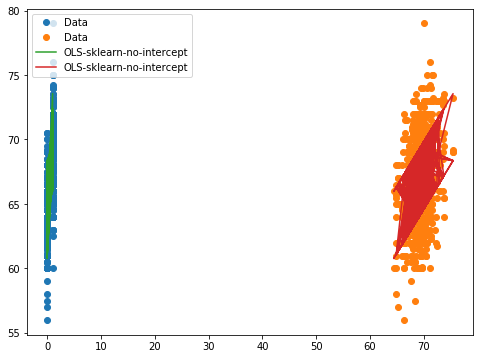

5.1972058397454015
θ0 16.476254727725724
θ1 5.1972058397454015


In [190]:
# Modèle avec Gender sur tout l'échantillon
X_g = data[['M', 'MeanParents']]
print(X_g)
y_g = data['Height']
X_train_gen, X_test_gen, y_train_gen, y_test_gen = model_selection.train_test_split(X_g, y_g, test_size=0.2)
skl_linmod_train_ge = linear_model.LinearRegression(fit_intercept=True)
skl_linmod_train_ge.fit(X_train_gen,y_train_gen) # Fit regression model
fig = plt.figure(figsize=(8, 6))
plt.plot(X_train_gen, y_train_gen, 'o', label="Data")
plt.plot(X_train_gen, skl_linmod_train_ge.predict(X_train_gen),
label="OLS-sklearn-no-intercept")
plt.legend(loc='upper left')
plt.show()
t0_train = skl_linmod_train_ge.intercept_
t1_train = skl_linmod_train_ge.coef_[0]
# coefficient de détermination
print('θ0'+' '+str(skl_linmod_train_ge.intercept_))
print('θ1'+' '+str(skl_linmod_train_ge.coef_[0]))

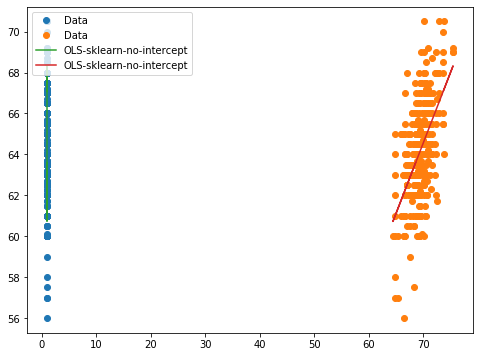

θ0 [16.29843816]
θ1 [0.         0.68977659]


In [173]:
# Modèle avec Gender les Femmes
X_g_f = F[['F', 'MeanParents']]
y_g_f = F[['Height']]
X_train_g_f, X_test_g_f, y_train_g_f, y_test_g_f = model_selection.train_test_split(X_g_f, y_g_f, test_size=0.2)
skl_linmod_train_g_f = linear_model.LinearRegression(fit_intercept=True)
skl_linmod_train_g_f.fit(X_train_g_f,y_train_g_f) # Fit regression model
fig = plt.figure(figsize=(8, 6))
plt.plot(X_train_g_f, y_train_g_f, 'o', label="Data")
plt.plot(X_train_g_f, skl_linmod_train_g_f.predict(X_train_g_f),
label="OLS-sklearn-no-intercept")
plt.legend(loc='upper left')
plt.show()
t0_train = skl_linmod_train_g_f.intercept_
t1_train = skl_linmod_train_g_f.coef_[0]
print('θ0'+' '+str(skl_linmod_train_g_f.intercept_))
print('θ1'+' '+str(skl_linmod_train_g_f.coef_[0]))

In [187]:
# calcul du coefficient de détermination avec les 2 modèles différents
mean = np.mean(data['Height'])
M['Predict'] = skl_linmod_train_g_m.predict(X_g_m)
M['Mean'] =  mean

F['Predict'] = skl_linmod_train_g_f.predict(X_g_f)
F['Mean'] = mean
data_con = pd.concat([M, F])
R2 = 1 - ((np.linalg.norm(data_con['Height'] - data_con['Predict']))**2/(np.linalg.norm(data_con['Height'] - data_con['Mean']))**2)
r2 = metrics.r2_score(data_con['Height'], data_con['Predict'])
#delta_mean = np.concatenate(delta_mean_m, delta_mean_f, axis=0)
print(R2)
print(r2)
#for index, row in data.iterrows():
#    if row['Gender'] == 'M':
#       row['DeltaM'] = row['Height'] - skl_linmod_train_g_m.predict(row[[['M', 'MeanParents']]])
#print(M)
# calcul du coefficient de détermination avec un modèle
mean = np.mean(data['Height'])
data['Predict'] = skl_linmod_train_ge.predict(data[['M', 'MeanParents']])
data['Mean'] =  mean
R2g = 1 - ((np.linalg.norm(data['Height'] - data['Predict']))**2/(np.linalg.norm(data['Height'] - data['Mean']))**2)
r2g = metrics.r2_score(data['Height'], data['Predict'])
print(R2g)
print(r2g)

0.6369982787071276
0.6369982787071278
0.6367845488135953
0.6367845488135953


/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

12-Régression avec les 2 variables explicatives

62.0
78.5
58.0
70.5
56.0
79.0
     const  Father  Mother
0      1.0    78.5    67.0
1      1.0    78.5    67.0
2      1.0    78.5    67.0
3      1.0    78.5    67.0
4      1.0    75.5    66.5
..     ...     ...     ...
893    1.0    68.5    65.0
894    1.0    68.5    65.0
895    1.0    68.5    65.0
896    1.0    68.5    65.0
897    1.0    68.5    65.0

[898 rows x 3 columns]


/home/parfait/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


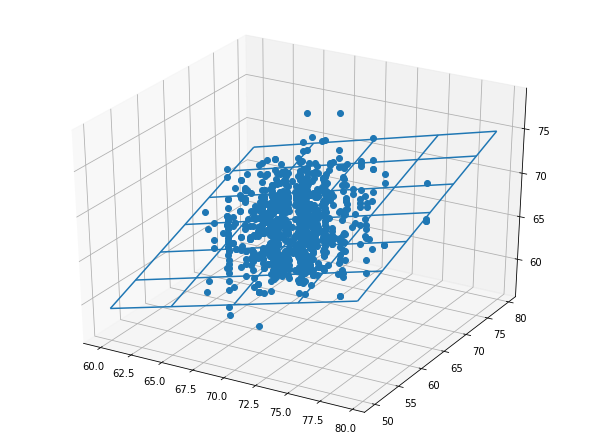

0      71.106990
1      71.106990
2      71.106990
3      71.106990
4      69.825692
         ...    
893    66.741591
894    66.741591
895    66.741591
896    66.741591
897    66.741591
Length: 898, dtype: float64
11.426645212936897


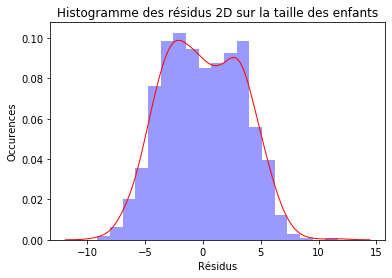

In [175]:
# Fit regression model
print(min(data['Father']))
print(max(data['Father']))
print(min(data['Mother']))
print(max(data['Mother']))

print(min(data['Height']))
print(max(data['Height']))
X = data[['Father', 'Mother']]
X = sm.add_constant(X)
print(X)
y = data['Height']
model2D = sm.OLS(y, X).fit()
results = sm.OLS(y, X).fit().params
XX = np.arange(60, 80, 0.5)
YY = np.arange(50, 80, 0.5)
xx, yy = np.meshgrid(XX, YY)
zz = results[0] + results[1]*xx + results[2]*yy
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.plot(X['Father'],X['Mother'],y,'o')
ax.plot_wireframe(xx, yy, zz, rstride=10, cstride=10)
plt.show()
      
y_pred = model2D.predict(X)
print(y_pred)

residus = y - y_pred
#plt.hist(residus, edgecolor = 'black')

sns.distplot(residus, color = 'blue', rug = False, kde_kws = {'color': 'red', 'lw': 1})
plt.xlabel('Résidus')
plt.ylabel('Occurences')
plt.title('Histogramme des résidus 2D sur la taille des enfants')
risque = metrics.mean_squared_error(y, y_pred)
print(risque)

13- Comparaison Modèle 2 variables à celui de MeanParents

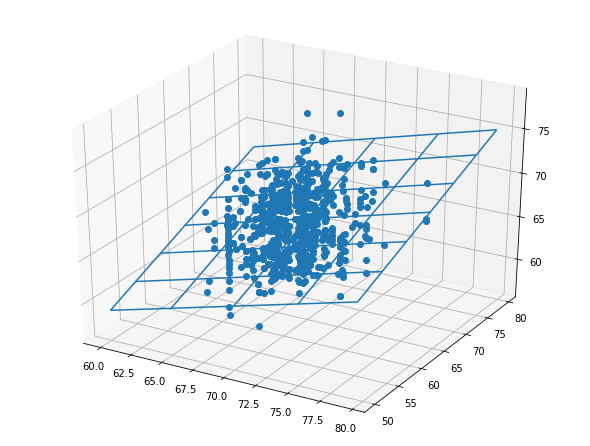

10.451965712820915
const     21.284349
Father     0.386337
Mother     0.291653
dtype: float64
21.284348989622828


In [176]:
X_train_2d, X_test_2d, y_train_2d, y_test_2d = model_selection.train_test_split(X, y, test_size=0.2)
model2D = sm.OLS(y_train_2d, X_train_2d).fit()
results = sm.OLS(y_train_2d, X_train_2d).fit().params

#skl_linmod_train_2d = linear_model.LinearRegression(fit_intercept=True)
#skl_linmod_train_2d.fit(X_train_2d,y_train_2d) # Fit regression model
XX = np.arange(60, 80, 0.5)
YY = np.arange(50, 80, 0.5)
xx, yy = np.meshgrid(XX, YY)
zz = results[0] + results[1]*xx + results[2]*yy
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.plot(X_train_2d['Father'],X_train_2d['Mother'],y_train_2d,'o')
ax.plot_wireframe(xx, yy, zz, rstride=10, cstride=10)
plt.show()

r_train_2d = metrics.mean_squared_error(y_test_2d, model2D.predict(X_test_2d))
print(r_train_2d)
print(results)     
print(results[0])